In [1]:
!pip install Sastrawi
!pip install gensim
!pip install tensorflow
!pip install pandas
!pip install nltk
!pip install scikit-learn
!pip install regex

You should consider upgrading via the 'c:\users\dzikra tazkirah\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dzikra tazkirah\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dzikra tazkirah\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dzikra tazkirah\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dzikra tazkirah\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dzikra tazkirah\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dzikra tazkirah\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd

#preprocessing
import regex as re
import string
#import demoji
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from gensim.models import FastText

#modelling
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, GRU, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


### Import Data

In [3]:
file = 'data ulasan.csv'
data = pd.read_csv(file, sep=';')
data['Ulasan']=data['Ulasan'].astype(str)
data['Label']=data['Label'].map({'positif': 1, 'negatif': 0})
data.head()

,Ulasan,Label
0,Membantu sekali untuk melacak kiriman dari lua...,1
1,Tracking barang kirimannya real time dan ide k...,1
2,Ayoo lengkapi fitur laiin,1
3,sangat membantu...,1
4,Membantu perkiraan jumlah pajaknya,1


In [4]:
print("Data Sudah Dilabel:")
print(data)
data.to_csv('labeled_ulasan.csv', index=False)

Data Sudah Dilabel:
                                                 Ulasan  Label
0     Membantu sekali untuk melacak kiriman dari lua...      1
1     Tracking barang kirimannya real time dan ide k...      1
2                             Ayoo lengkapi fitur laiin      1
3                                    sangat membantu...      1
4                    Membantu perkiraan jumlah pajaknya      1
...                                                 ...    ...
1184  Ya ngarepin apa dari aplikasi pemerintah, keba...      0
1185  Error mulu skrng. Masih belum bener tidak bs d...      0
1186  Setelah update malah tidak bisa login. Padahal...      0
1187  jujur gw sebagai warga indonesia kecewa sama a...      0
1188  Ini aplikasi sudah berminggu² nga bisa di paka...      0

[1189 rows x 2 columns]


### Preprocessing Data

In [5]:
#!pip install demoji
import demoji
#!pip install demoji==1.1.0
## Data Cleaning
def data_cleaning(text):
    # Menghapus karakter khusus dalam teks, seperti tab, newline, dan backslash
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ").replace('.'," ")
    
    # Menghapus non ASCII (emoticon, chinese word, .etc)
    text =  text.encode('ascii', 'replace').decode('ascii')

    # Menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", 
text).split())
    
    # Menghapus incomplete URL
    text = text.replace("http://", " ").replace("https://", " ")
    
    # Menghapus angka dalam teks menggunakan regular expression
    text = re.sub(r"\d+", " ", text)
    
    # Menghapus emotikon dari teks menggunakan regular expression
    emoticon_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F" # emoticons
                              u"\U0001F300-\U0001F5FF" # simbol & piktogram
                              u"\U0001F680-\U0001F6FF" # transportasi & simbol peralatan
                              u"\U0001F1E0-\U0001F1FF" # bendera negara
                              u"\U00002702-\U000027B0" # simbol lainnya
                              u"\U000024C2-\U0001F251"
                              "]+", flags=re.UNICODE)
    text = emoticon_pattern.sub(r'', text)
    
    # Menghapus punctuation
    text = text.translate(str.maketrans("","",string.punctuation))
    
    # Menghapus spasi yang ada di awal dan akhir teks menggunakan str.strip()
    text = text.strip()
    
    # Menghapus spasi berlebih dalam teks dan menggantinya dengan satu spasi menggunakan regular expressions
    text = re.sub(r'\s+', ' ', text)
    
    # Mengganti multiple whitespace (spasi berturut-turut) dengan satu spasi menggunakan regular expression
    text = re.sub('\s+', ' ', text)
    
    # Menghapus kata-kata yang terdiri dari satu huruf (single character) dalam teks menggunakan regular expression
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)
    return text

# Terapkan fungsi pada kolom teks
data['Ulasan'] = data['Ulasan'].astype(str)
data['cleaned_ulasan'] = data['Ulasan'].apply(data_cleaning)

print("Cleaned Ulasan:")
print(data['cleaned_ulasan'])
data.to_csv('cleaned_ulasan.csv', index=False)

Cleaned Ulasan:
0       Membantu sekali untuk melacak kiriman dari lua...
1       Tracking barang kirimannya real time dan ide k...
2                               Ayoo lengkapi fitur laiin
3                                         sangat membantu
4                      Membantu perkiraan jumlah pajaknya
                              ...                        
1184    Ya ngarepin apa dari aplikasi pemerintah keban...
1185    Error mulu skrng Masih belum bener tidak bs di...
1186    Setelah update malah tidak bisa login Padahal ...
1187    jujur gw sebagai warga indonesia kecewa sama a...
1188    Ini aplikasi sudah berminggu nga bisa di pakai...
Name: cleaned_ulasan, Length: 1189, dtype: object


### Case Folding

In [6]:
data['casefolded_ulasan'] = data['cleaned_ulasan'].str.lower()
print('Case Folding Ulasan : \n')
print(data['casefolded_ulasan'])
print('\n\n\n')

Case Folding Ulasan : 

0       membantu sekali untuk melacak kiriman dari lua...
1       tracking barang kirimannya real time dan ide k...
2                               ayoo lengkapi fitur laiin
3                                         sangat membantu
4                      membantu perkiraan jumlah pajaknya
                              ...                        
1184    ya ngarepin apa dari aplikasi pemerintah keban...
1185    error mulu skrng masih belum bener tidak bs di...
1186    setelah update malah tidak bisa login padahal ...
1187    jujur gw sebagai warga indonesia kecewa sama a...
1188    ini aplikasi sudah berminggu nga bisa di pakai...
Name: casefolded_ulasan, Length: 1189, dtype: object






### Tokenizing

In [7]:
data['tokenized_ulasan'] = data['casefolded_ulasan'].apply(nltk.word_tokenize)
print('Tokenizing Ulasan : \n')
print(data['tokenized_ulasan'])
print('\n\n\n')

Tokenizing Ulasan : 

0       [membantu, sekali, untuk, melacak, kiriman, da...
1       [tracking, barang, kirimannya, real, time, dan...
2                          [ayoo, lengkapi, fitur, laiin]
3                                      [sangat, membantu]
4                 [membantu, perkiraan, jumlah, pajaknya]
                              ...                        
1184    [ya, ngarepin, apa, dari, aplikasi, pemerintah...
1185    [error, mulu, skrng, masih, belum, bener, tida...
1186    [setelah, update, malah, tidak, bisa, login, p...
1187    [jujur, gw, sebagai, warga, indonesia, kecewa,...
1188    [ini, aplikasi, sudah, berminggu, nga, bisa, d...
Name: tokenized_ulasan, Length: 1189, dtype: object






### Normalization

In [8]:
with open('combined_slang_words.txt', 'r') as file:
    kamus_slang = eval(file.read())

# Function for text normalization
def normalize_ulasan(tokenized_ulasan):
    return [kamus_slang[word] if word in kamus_slang else word for word in tokenized_ulasan]

# Spelling normalisasi pada teks
data['normalized_ulasan'] = data['tokenized_ulasan'].apply(normalize_ulasan)

# Display the results
print('Normalization Ulasan : \n')
print(data['normalized_ulasan'])
print('\n\n\n')

Normalization Ulasan : 

0       [membantu, sekali, untuk, melacak, kiriman, da...
1       [tracking, barang, kirimannya, real, time, dan...
2                          [ayoo, lengkapi, fitur, laiin]
3                                      [sangat, membantu]
4                 [membantu, perkiraan, jumlah, pajaknya]
                              ...                        
1184    [iya, ngarepin, apa, dari, aplikasi, pemerinta...
1185    [error, melulu, skrng, masih, belum, benar, ti...
1186    [setelah, update, bahkan, tidak, bisa, login, ...
1187    [jujur, saya, sebagai, warga, indonesia, kecew...
1188    [ini, aplikasi, sudah, berminggu, nga, bisa, d...
Name: normalized_ulasan, Length: 1189, dtype: object






### Stopwords Removal

In [9]:
## Stopwords Removal
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_words = set(stopwords.words("indonesian"))
stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()

def remove_stopwords(normalized_ulasan):
    return [word for word in normalized_ulasan if word not in stop_words]

data['stopwordrmv_ulasan'] = data['normalized_ulasan'].apply(remove_stopwords)
print('Stopwords Removal Ulasan : \n')
print(data['stopwordrmv_ulasan'])
print('\n\n\n')

Stopwords Removal Ulasan : 

0        [membantu, melacak, kiriman, luarnegeri, pospjt]
1       [tracking, barang, kirimannya, real, time, ide...
2                          [ayoo, lengkapi, fitur, laiin]
3                                              [membantu]
4                         [membantu, perkiraan, pajaknya]
                              ...                        
1184    [iya, ngarepin, aplikasi, pemerintah, kebanyak...
1185            [error, melulu, skrng, dipakai, tracking]
1186                        [update, login, lancar, jaya]
1187    [jujur, warga, indonesia, kecewa, aplikasi, be...
1188    [aplikasi, berminggu, nga, pakai, nga, perbaik...
Name: stopwordrmv_ulasan, Length: 1189, dtype: object






### Stemming

In [10]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#!pip install swifter
import swifter
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemmed_wrapper(term):
    return stemmer.stem(term)
term_dict = {}
for document in data['stopwordrmv_ulasan']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
print(term_dict)
print("------------------------")
# Menerapkan kata-kata yang telah di-stemming ke dalam data
def get_stemmed_term(document):
    return [term_dict[term] for term in document]
data['stemmed_ulasan'] = data['stopwordrmv_ulasan'].swifter.apply(get_stemmed_term)
print('Stemming Ulasan : \n')
print(data['stemmed_ulasan'])
print('\n\n\n')

c:\Users\Dzikra Tazkirah\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2840
------------------------
membantu : bantu
melacak : lacak
kiriman : kirim
luarnegeri : luarnegeri
pospjt : pospjt
tracking : tracking
barang : barang
kirimannya : kirim
real : real
time : time
ide : ide
kategori : kategori
pengelompokan : kelompok
tarif : tarif
lartasnya : lartasnya
bagus : bagus
ayoo : ayoo
lengkapi : lengkap
fitur : fitur
laiin : laiin
perkiraan : kira
pajaknya : pajak
makinbaik : makinbaik
invosi : invosi
semoga : moga
aplikasi : aplikasi
mohon : mohon
search : search
kolom : kolom
list : list
jenis : jenis
terimakasih : terimakasih
tertipu : tipu
cn : cn
pibk : pibk
done : done
ditunggu : tunggu
tpb : tpb
pib : pib
nya : nya
alhamdulillah : alhamdulillah
enaklah : enak
mantab : mantab
mantap : mantap
juragan : juragan
google : google
play : play
namanya : nama
ceisa : ceisa
app : app
drawer : drawer
mobile : mobile
bea : bea
cukai : cukai
gak : gak
nomor : nomor
resi : resi
input : input
manual : manual
kali : kali
ngecek : ngecek
status : status
appnya : appn

Pandas Apply: 100%|██████████| 1189/1189 [00:00<?, ?it/s]

Stemming Ulasan : 

0               [bantu, lacak, kirim, luarnegeri, pospjt]
1       [tracking, barang, kirim, real, time, ide, kat...
2                           [ayoo, lengkap, fitur, laiin]
3                                                 [bantu]
4                                    [bantu, kira, pajak]
                              ...                        
1184    [iya, ngarepin, aplikasi, perintah, banyak, su...
1185              [error, melulu, skrng, pakai, tracking]
1186                        [update, login, lancar, jaya]
1187    [jujur, warga, indonesia, kecewa, aplikasi, be...
1188    [aplikasi, minggu, nga, pakai, nga, baik, duhh...
Name: stemmed_ulasan, Length: 1189, dtype: object






In [11]:
data['final_ulasan'] = [' '.join(map(str, l)) for l in data['stemmed_ulasan']]
print('Data Ulasan Bersih : \n')
print(data['final_ulasan'])
print('\n\n\n')
# Menyimpan hasil ke file CSV
data.to_csv('Data Ulasan_Bersih.csv', index=False, sep=";")

Data Ulasan Bersih : 

0                     bantu lacak kirim luarnegeri pospjt
1       tracking barang kirim real time ide kategori k...
2                                ayoo lengkap fitur laiin
3                                                   bantu
4                                        bantu kira pajak
                              ...                        
1184    iya ngarepin aplikasi perintah banyak suka jel...
1185                    error melulu skrng pakai tracking
1186                             update login lancar jaya
1187    jujur warga indonesia kecewa aplikasi bea cuka...
1188    aplikasi minggu nga pakai nga baik duhhh kelas...
Name: final_ulasan, Length: 1189, dtype: object






### Word Embedding Menggunakan FastText

In [12]:
data_clean = pd.read_csv('Data Ulasan_Bersih.csv', sep=";")
data = data_clean.drop(['Ulasan', 'cleaned_ulasan', 'casefolded_ulasan', 'tokenized_ulasan', 'normalized_ulasan', 'stopwordrmv_ulasan', 'stemmed_ulasan'], axis=1)
# Menghapus data missing value
data = data.dropna()
# Menampilkan DataFrame setelah penghapusan nilai yang hilang
print("DataFrame setelah menghapus nilai yang hilang:")
print(data)
data.to_csv('Data Final Clean.csv', index=False, sep=";")

DataFrame setelah menghapus nilai yang hilang:
      Label                                       final_ulasan
0         1                bantu lacak kirim luarnegeri pospjt
1         1  tracking barang kirim real time ide kategori k...
2         1                           ayoo lengkap fitur laiin
3         1                                              bantu
4         1                                   bantu kira pajak
...     ...                                                ...
1184      0  iya ngarepin aplikasi perintah banyak suka jel...
1185      0                  error melulu skrng pakai tracking
1186      0                           update login lancar jaya
1187      0  jujur warga indonesia kecewa aplikasi bea cuka...
1188      0  aplikasi minggu nga pakai nga baik duhhh kelas...

[1181 rows x 2 columns]


In [13]:
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import gzip
from urllib.request import urlopen

file_path = 'cc.id.300.vec.gz'
file1 = gzip.open(file_path)

vocab_and_vectors = {}
# Mengubah kata-kata menjadi indeks kamus dan vektor sebagai nilai kata
for line in file1:
    values = line.split()
    word = values [0].decode('utf-8')
    vector = np.asarray(values[1:], dtype='float32')
    vocab_and_vectors[word] = vector

# Jumlah fitur yang harus di extract tokenizer
features = 500
tokenizer = Tokenizer(num_words = features)
tokenizer.fit_on_texts(data['final_ulasan'])

# Mendapatkan semua index kata yang telah diperoleh
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

# Token matriks
X_sequences = tokenizer.texts_to_sequences(data['final_ulasan'])
X_pad = pad_sequences(X_sequences)
Y = data['Label']
print(data['final_ulasan'])
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = vocab_and_vectors.get(word)
    #padding
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
np.save('embedding_matrix.npy', embedding_matrix)
embedding_matrix = np.load('embedding_matrix.npy')

Found 2359 unique tokens
0                     bantu lacak kirim luarnegeri pospjt
1       tracking barang kirim real time ide kategori k...
2                                ayoo lengkap fitur laiin
3                                                   bantu
4                                        bantu kira pajak
                              ...                        
1184    iya ngarepin aplikasi perintah banyak suka jel...
1185                    error melulu skrng pakai tracking
1186                             update login lancar jaya
1187    jujur warga indonesia kecewa aplikasi bea cuka...
1188    aplikasi minggu nga pakai nga baik duhhh kelas...
Name: final_ulasan, Length: 1181, dtype: object


In [14]:
# Print contoh hasil pemberian indeks kata
print("Original Text:\n", data['final_ulasan'][4])
print("\nIndexed Sequence:\n", X_sequences[4])

# Print contoh hasil padding
print("\nPadded Sequence:\n", X_pad[4])

# Print contoh hasil word embedding
example_word = list(word_index.keys())[6]
example_embedding = vocab_and_vectors.get(example_word)
print("\nExample Word Embedding for '{}':\n".format(example_word), example_embedding)

Original Text:
 bantu kira pajak

Indexed Sequence:
 [16, 259, 2]

Padded Sequence:
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  16 259   2]

Example Word Embedding for 'daftar':
 [ 0.0022  0.0991  0.0112  0.0433 -0.0373  0.0078  0.0097  0.0015 -0.0037
 -0.0846 -0.0211 -0.0152  0.0081  0.0447  0.0126  0.0194  0.01    0.0046
  0.0216  0.0361 -0.0452  0.0486 -0.0009  0.0139  0.0117 -0.0218 -0.0629
  0.0634  0.0096 -0.034   0.0363 -0.0157  0.0278  0.0032  0.0618 -0.0173
  0.0036 -0.0188  0.0034  0.0013  0.0331  0.0235 -0.0661 -0.0345 -0.0251
  0.0237 -0.0498  0.0406 -0.021   0.0289 -0.0525  0.0397  0.0238 -0.0651
  0.0348  0.0209 -0.0115  0.0214 -0.1133 -0.0187  0.0184  0.0268  0.0212
  0.0129  0.0341 -0.0288 -0.0123  0.0619  0.0079 -0.0658  0.0058 -0.007
 -0.0587 -0.0357 -0.0095 -0.0522 -0.0621 -0.0672 -0.0304  0.0385  0.0535
 -0.0064  0.0672 -0.0263 -0.0039  0.

### Pembagian Data

In [15]:
y = data['Label']
#80:10:10
X_train, X_temp, Y_train, Y_temp = train_test_split(X_pad, y, test_size = 0.2, stratify = y, random_state=14)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, stratify = Y_temp, test_size=0.5)

# Menghitung banyaknya label 0 dan 1 dari setiap set data
train_label_counts = Y_train.value_counts()
val_label_counts = Y_val.value_counts()
test_label_counts = Y_test.value_counts()

print("Banyaknya label 0 dan 1 dari setiap set data:")
print("Train set:")
print(train_label_counts)
print("\nValidation set:")
print(val_label_counts)
print("\nTest set:")
print(test_label_counts)

Banyaknya label 0 dan 1 dari setiap set data:
Train set:
Label
0    604
1    340
Name: count, dtype: int64

Validation set:
Label
0    76
1    42
Name: count, dtype: int64

Test set:
Label
0    76
1    43
Name: count, dtype: int64


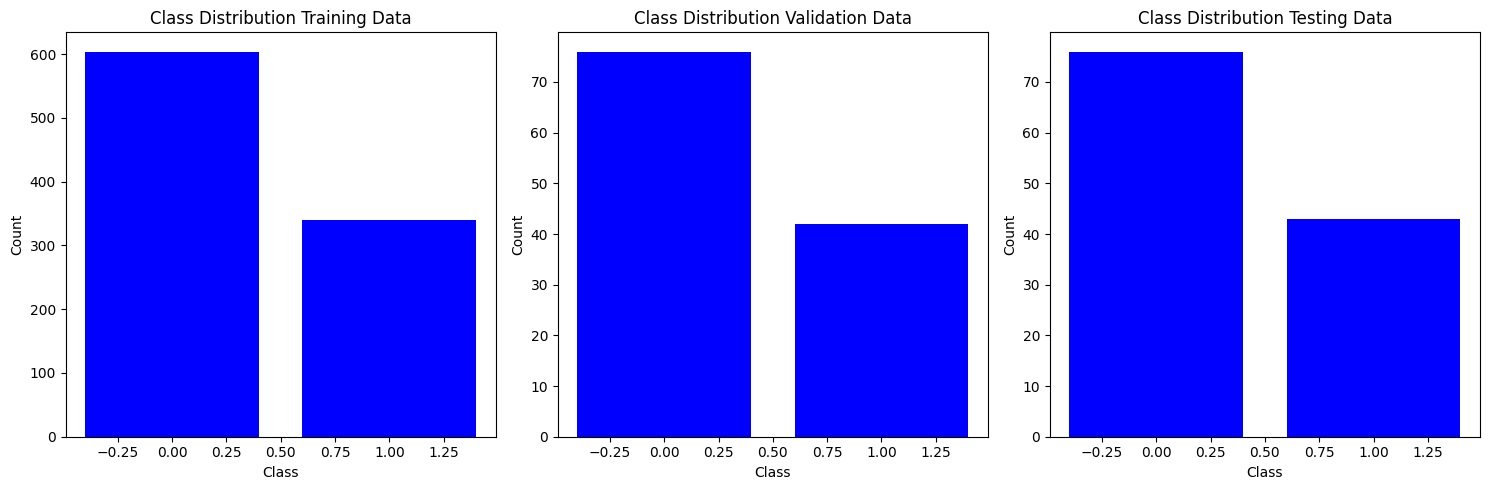

In [16]:
from collections import Counter
# Melihat sebaran label pada setiap pembagian data 
Y_train1 = np.array(Y_train)
Y_test1 = np.array(Y_test)
Y_val1 = np.array(Y_val)

train1_counts = [len(Y_train1[Y_train1 == 0]), len(Y_train1[Y_train1 == 1])]
test1_counts = [len(Y_test1[Y_test1 == 0]), len(Y_test1[Y_test1 == 1])]
val1_counts = [len(Y_val1[Y_val1 == 0]), len(Y_val1[Y_val1 == 1])]

# Plot the class distribution before and after resampling
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.bar([0, 1], train1_counts, color='blue')
plt.title('Class Distribution Training Data')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.bar([0, 1], val1_counts, color='blue')
plt.title('Class Distribution Validation Data')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.bar([0, 1], test1_counts, color='blue')
plt.title('Class Distribution Testing Data')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Looping Training

In [17]:
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
from keras.callbacks import EarlyStopping

### Unit Bi-GRU


Training model with Unit : 32
Epoch 1/100
59/59 [==============================] - 6s 32ms/step - loss: 0.6875 - accuracy: 0.5985 - val_loss: 0.6779 - val_accuracy: 0.6695
Epoch 2/100
59/59 [==============================] - 1s 18ms/step - loss: 0.6711 - accuracy: 0.6600 - val_loss: 0.6608 - val_accuracy: 0.6610
Epoch 3/100
59/59 [==============================] - 1s 16ms/step - loss: 0.6502 - accuracy: 0.6547 - val_loss: 0.6389 - val_accuracy: 0.6610
Epoch 4/100
59/59 [==============================] - 1s 16ms/step - loss: 0.6291 - accuracy: 0.6557 - val_loss: 0.6189 - val_accuracy: 0.6610
Epoch 5/100
59/59 [==============================] - 1s 16ms/step - loss: 0.6106 - accuracy: 0.6600 - val_loss: 0.6011 - val_accuracy: 0.6610
Epoch 6/100
59/59 [==============================] - 1s 16ms/step - loss: 0.5908 - accuracy: 0.6663 - val_loss: 0.5836 - val_accuracy: 0.6610
Epoch 7/100
59/59 [==============================] - 1s 16ms/step - loss: 0.5746 - accuracy: 0.6748 - val_loss: 0.562

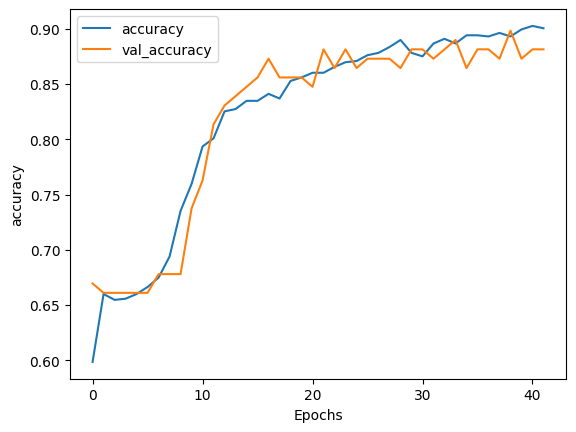

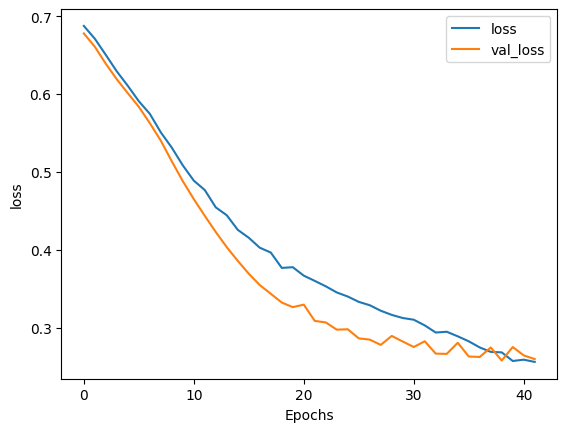

4/4 [==============================] - 1s 11ms/step

Training model with Unit : 64
Epoch 1/100
59/59 [==============================] - 6s 35ms/step - loss: 0.6776 - accuracy: 0.6261 - val_loss: 0.6615 - val_accuracy: 0.6610
Epoch 2/100
59/59 [==============================] - 1s 23ms/step - loss: 0.6432 - accuracy: 0.6695 - val_loss: 0.6291 - val_accuracy: 0.6610
Epoch 3/100
59/59 [==============================] - 1s 24ms/step - loss: 0.6123 - accuracy: 0.6674 - val_loss: 0.6050 - val_accuracy: 0.6610
Epoch 4/100
59/59 [==============================] - 1s 24ms/step - loss: 0.5881 - accuracy: 0.6695 - val_loss: 0.5825 - val_accuracy: 0.6610
Epoch 5/100
59/59 [==============================] - 1s 23ms/step - loss: 0.5625 - accuracy: 0.6811 - val_loss: 0.5550 - val_accuracy: 0.6780
Epoch 6/100
59/59 [==============================] - 2s 26ms/step - loss: 0.5378 - accuracy: 0.7034 - val_loss: 0.5230 - val_accuracy: 0.6610
Epoch 7/100
59/59 [==============================] - 1s 22ms/step

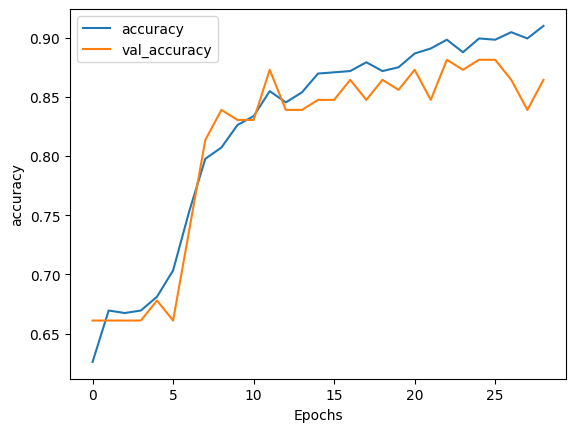

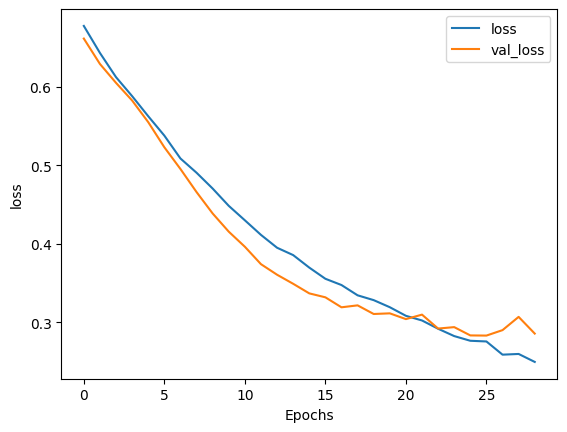

4/4 [==============================] - 1s 14ms/step

Training model with Unit : 128
Epoch 1/100
59/59 [==============================] - 8s 59ms/step - loss: 0.6663 - accuracy: 0.6388 - val_loss: 0.6414 - val_accuracy: 0.6441
Epoch 2/100
59/59 [==============================] - 3s 46ms/step - loss: 0.6209 - accuracy: 0.6483 - val_loss: 0.6014 - val_accuracy: 0.6610
Epoch 3/100
59/59 [==============================] - 3s 42ms/step - loss: 0.5822 - accuracy: 0.6706 - val_loss: 0.5651 - val_accuracy: 0.6610
Epoch 4/100
59/59 [==============================] - 2s 42ms/step - loss: 0.5487 - accuracy: 0.6875 - val_loss: 0.5308 - val_accuracy: 0.6780
Epoch 5/100
59/59 [==============================] - 3s 44ms/step - loss: 0.5183 - accuracy: 0.7606 - val_loss: 0.4975 - val_accuracy: 0.7458
Epoch 6/100
59/59 [==============================] - 2s 42ms/step - loss: 0.4892 - accuracy: 0.8104 - val_loss: 0.4623 - val_accuracy: 0.8136
Epoch 7/100
59/59 [==============================] - 2s 42ms/ste

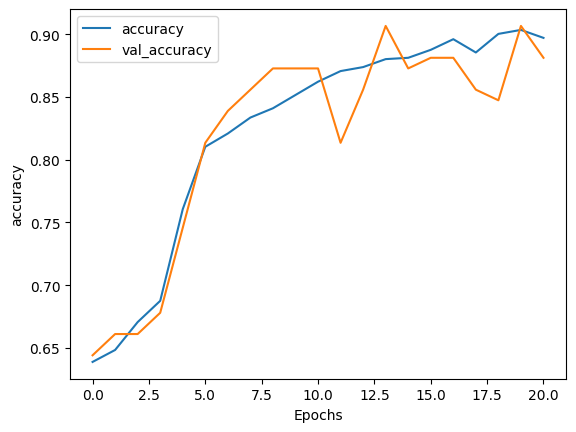

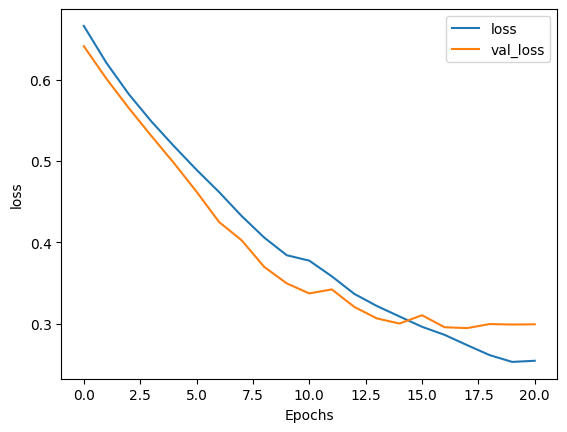

4/4 [==============================] - 1s 24ms/step

Best Result:
Best Unit: 32
Validation Accuracy: 0.8983050584793091

Unit: 32
Validation Loss: 0.257885217666626
Validation Accuracy: 0.8983050584793091
F1-Score: 0.8461538461538461

Unit: 64
Validation Loss: 0.28301799297332764
Validation Accuracy: 0.8813559412956238
F1-Score: 0.8157894736842106

Unit: 128
Validation Loss: 0.29445692896842957
Validation Accuracy: 0.8559321761131287
F1-Score: 0.7792207792207793


In [19]:
# Initialize best results
best_val_accuracy = 0
units = [32, 64, 128]
best_unit = None

# Initialize lists to store results
hasil_loss = []
hasil_akurasi = []
hasil_fone = []

# Loop through hyperparameters
for unit in units:
        print(f"\nTraining model with Unit : {unit}")

        # Build BiGRU model
        model = Sequential()
        model.add(Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False))
        model.add(Bidirectional(GRU(unit)))
        model.add(Dropout(0.3))
        model.add(Dense((64), activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        # Compile model
        optimizer = Adam(learning_rate=0.0001)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', restore_best_weights=True)

        # Train model
        history = model.fit(X_train, Y_train, epochs=100, batch_size=16, validation_data=(X_val, Y_val), callbacks=[early_stopping])

        # Evaluate model on test data
        val_loss, val_accuracy = model.evaluate(X_val, Y_val)
        print(f'Validation accuracy: {val_accuracy}')
        print(f'Validation loss: {val_loss}')
        
        # Plotting loss and accuracy graphs
        def plot_graphs(history, string):
            plt.plot(history.history[string])
            plt.plot(history.history['val_'+string])
            plt.xlabel("Epochs")
            plt.ylabel(string)
            plt.legend([string, 'val_'+string])
            plt.show()

        # Plot the accuracy and loss history
        plot_graphs(history, 'accuracy')
        plot_graphs(history, 'loss')

        # Predict on validation data
        y_pred_prob = model.predict(X_val)

        # Thresholding to get predicted classes (0 or 1)
        y_pred = (y_pred_prob > 0.5).astype(int)

        # Classification report
        report = classification_report(Y_val, y_pred, output_dict=True)
        precision = report['1']['precision']
        recall = report['1']['recall']
        f1 = report['1']['f1-score']
        
        # Append results to lists
        hasil_loss.append(val_loss)
        hasil_akurasi.append(val_accuracy)
        hasil_fone.append(f1)

        # Check if current result is the best
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_unit = unit
            
# Print the best result
print("\nBest Result:")
print(f"Best Unit: {best_unit}")
print(f"Validation Accuracy: {best_val_accuracy}")

# Print the results for each unit 
for i, unit in enumerate(units):
    print(f"\nUnit: {unit}")
    print(f"Validation Loss: {hasil_loss[i]}")
    print(f"Validation Accuracy: {hasil_akurasi[i]}")
    print(f"F1-Score: {hasil_fone[i]}")

### Neuron


Training model with Neuron : 32
Epoch 1/100
59/59 [==============================] - 10s 42ms/step - loss: 0.6808 - accuracy: 0.6155 - val_loss: 0.6625 - val_accuracy: 0.6525
Epoch 2/100
59/59 [==============================] - 1s 17ms/step - loss: 0.6550 - accuracy: 0.6483 - val_loss: 0.6366 - val_accuracy: 0.6441
Epoch 3/100
59/59 [==============================] - 1s 17ms/step - loss: 0.6320 - accuracy: 0.6483 - val_loss: 0.6161 - val_accuracy: 0.6441
Epoch 4/100
59/59 [==============================] - 1s 17ms/step - loss: 0.6132 - accuracy: 0.6600 - val_loss: 0.6000 - val_accuracy: 0.6610
Epoch 5/100
59/59 [==============================] - 1s 17ms/step - loss: 0.5953 - accuracy: 0.6695 - val_loss: 0.5846 - val_accuracy: 0.6610
Epoch 6/100
59/59 [==============================] - 1s 17ms/step - loss: 0.5828 - accuracy: 0.6674 - val_loss: 0.5682 - val_accuracy: 0.6610
Epoch 7/100
59/59 [==============================] - 1s 18ms/step - loss: 0.5611 - accuracy: 0.6727 - val_loss: 0.

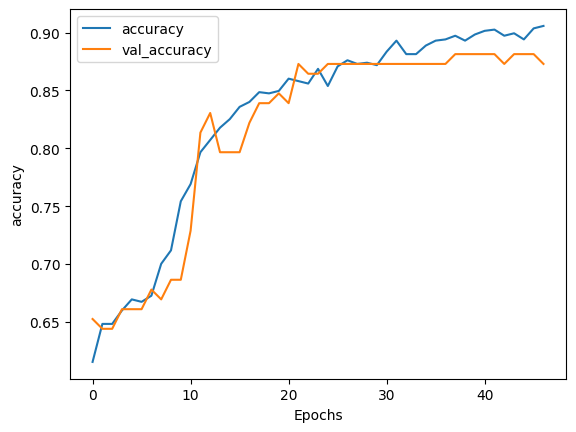

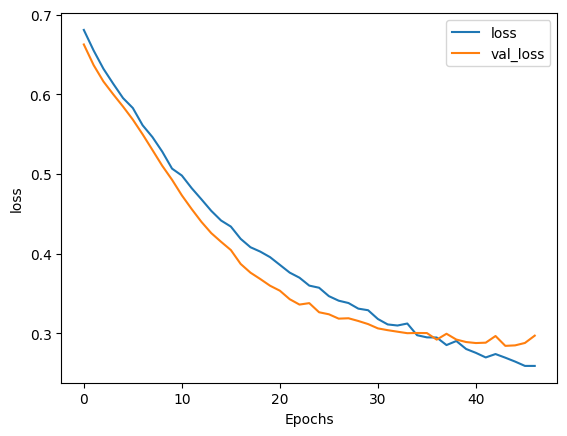

4/4 [==============================] - 1s 11ms/step

Training model with Neuron : 64
Epoch 1/100
59/59 [==============================] - 9s 38ms/step - loss: 0.6898 - accuracy: 0.5551 - val_loss: 0.6805 - val_accuracy: 0.6441
Epoch 2/100
59/59 [==============================] - 1s 17ms/step - loss: 0.6727 - accuracy: 0.6525 - val_loss: 0.6633 - val_accuracy: 0.6441
Epoch 3/100
59/59 [==============================] - 1s 16ms/step - loss: 0.6531 - accuracy: 0.6547 - val_loss: 0.6436 - val_accuracy: 0.6610
Epoch 4/100
59/59 [==============================] - 1s 17ms/step - loss: 0.6355 - accuracy: 0.6525 - val_loss: 0.6263 - val_accuracy: 0.6610
Epoch 5/100
59/59 [==============================] - 1s 18ms/step - loss: 0.6188 - accuracy: 0.6600 - val_loss: 0.6123 - val_accuracy: 0.6610
Epoch 6/100
59/59 [==============================] - 1s 17ms/step - loss: 0.6004 - accuracy: 0.6684 - val_loss: 0.5962 - val_accuracy: 0.6610
Epoch 7/100
59/59 [==============================] - 1s 17ms/st

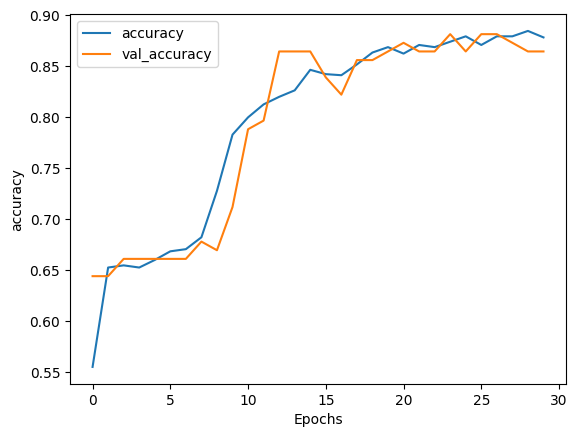

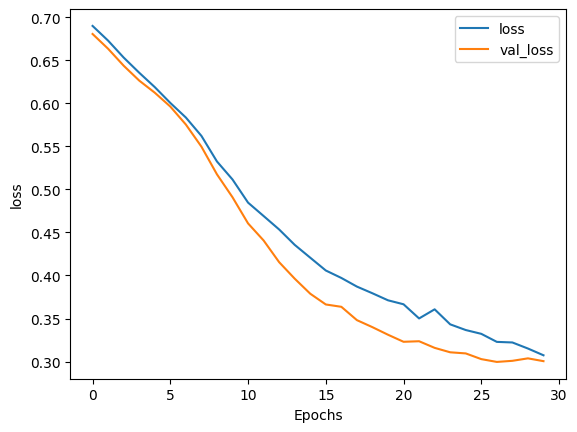

4/4 [==============================] - 1s 13ms/step

Training model with Neuron : 128
Epoch 1/100
59/59 [==============================] - 8s 39ms/step - loss: 0.6828 - accuracy: 0.6250 - val_loss: 0.6715 - val_accuracy: 0.6441
Epoch 2/100
59/59 [==============================] - 1s 19ms/step - loss: 0.6625 - accuracy: 0.6451 - val_loss: 0.6488 - val_accuracy: 0.6441
Epoch 3/100
59/59 [==============================] - 1s 20ms/step - loss: 0.6379 - accuracy: 0.6451 - val_loss: 0.6250 - val_accuracy: 0.6441
Epoch 4/100
59/59 [==============================] - 1s 21ms/step - loss: 0.6161 - accuracy: 0.6547 - val_loss: 0.6069 - val_accuracy: 0.6610
Epoch 5/100
59/59 [==============================] - 1s 20ms/step - loss: 0.5964 - accuracy: 0.6695 - val_loss: 0.5910 - val_accuracy: 0.6610
Epoch 6/100
59/59 [==============================] - 1s 21ms/step - loss: 0.5785 - accuracy: 0.6737 - val_loss: 0.5721 - val_accuracy: 0.6695
Epoch 7/100
59/59 [==============================] - 1s 20ms/s

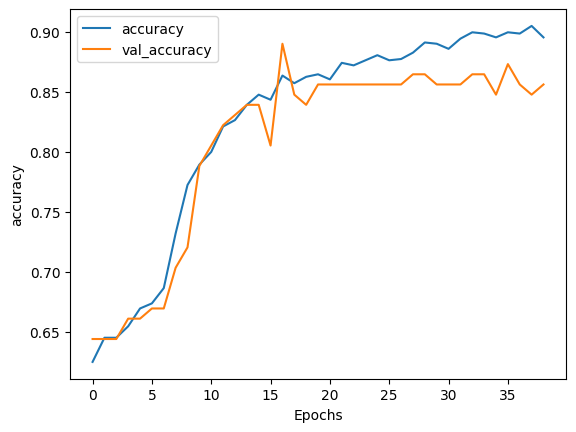

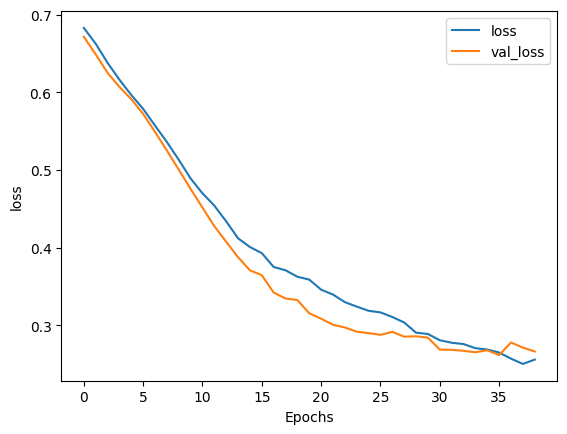

4/4 [==============================] - 1s 13ms/step

Best Result:
Best Neuron: 32
Validation Accuracy: 0.8813559412956238

Neuron: 32
Validation Loss: 0.2843678891658783
Validation Accuracy: 0.8813559412956238
F1-Score: 0.8157894736842106

Neuron: 64
Validation Loss: 0.29959142208099365
Validation Accuracy: 0.8813559412956238
F1-Score: 0.8205128205128205

Neuron: 128
Validation Loss: 0.26154211163520813
Validation Accuracy: 0.8728813529014587
F1-Score: 0.810126582278481


In [20]:
# Initialize best results
best_val_accuracy = 0
neurons = [32, 64, 128]
best_neuron = None

# Initialize lists to store results
hasil_loss = []
hasil_akurasi = []
hasil_fone = []

# Loop through hyperparameters
for neuron in neurons:
        print(f"\nTraining model with Neuron : {neuron}")

        # Build BiGRU model
        model = Sequential()
        model.add(Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False))
        model.add(Bidirectional(GRU(best_unit)))
        model.add(Dropout(0.3))
        model.add(Dense((neuron), activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        # Compile model
        optimizer = Adam(learning_rate=0.0001)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', restore_best_weights=True)

        # Train model
        history = model.fit(X_train, Y_train, epochs=100, batch_size=16, validation_data=(X_val, Y_val), callbacks=[early_stopping])

        # Evaluate model on test data
        val_loss, val_accuracy = model.evaluate(X_val, Y_val)
        print(f'Validation accuracy: {val_accuracy}')
        print(f'Validation loss: {val_loss}')
        
        # Plotting loss and accuracy graphs
        def plot_graphs(history, string):
            plt.plot(history.history[string])
            plt.plot(history.history['val_'+string])
            plt.xlabel("Epochs")
            plt.ylabel(string)
            plt.legend([string, 'val_'+string])
            plt.show()

        # Plot the accuracy and loss history
        plot_graphs(history, 'accuracy')
        plot_graphs(history, 'loss')

        # Predict on validation data
        y_pred_prob = model.predict(X_val)

        # Thresholding to get predicted classes (0 or 1)
        y_pred = (y_pred_prob > 0.5).astype(int)

        # Classification report
        report = classification_report(Y_val, y_pred, output_dict=True)
        precision = report['1']['precision']
        recall = report['1']['recall']
        f1 = report['1']['f1-score']

        # Append results to lists
        hasil_loss.append(val_loss)
        hasil_akurasi.append(val_accuracy)
        hasil_fone.append(f1)
        
        # Check if current result is the best
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_neuron = neuron
            
# Print the best result
print("\nBest Result:")
print(f"Best Neuron: {best_neuron}")
print(f"Validation Accuracy: {best_val_accuracy}")

# Print the results for each neuron
for i, neuron in enumerate(neurons):
    print(f"\nNeuron: {neuron}")
    print(f"Validation Loss: {hasil_loss[i]}")
    print(f"Validation Accuracy: {hasil_akurasi[i]}")
    print(f"F1-Score: {hasil_fone[i]}")

### Dropout


Training model with Dropout : 0.1
Epoch 1/100
59/59 [==============================] - 8s 38ms/step - loss: 0.6740 - accuracy: 0.6515 - val_loss: 0.6632 - val_accuracy: 0.6610
Epoch 2/100
59/59 [==============================] - 1s 17ms/step - loss: 0.6509 - accuracy: 0.6653 - val_loss: 0.6428 - val_accuracy: 0.6610
Epoch 3/100
59/59 [==============================] - 1s 20ms/step - loss: 0.6299 - accuracy: 0.6706 - val_loss: 0.6247 - val_accuracy: 0.6610
Epoch 4/100
59/59 [==============================] - 1s 17ms/step - loss: 0.6109 - accuracy: 0.6684 - val_loss: 0.6085 - val_accuracy: 0.6610
Epoch 5/100
59/59 [==============================] - 1s 17ms/step - loss: 0.5932 - accuracy: 0.6695 - val_loss: 0.5945 - val_accuracy: 0.6695
Epoch 6/100
59/59 [==============================] - 1s 18ms/step - loss: 0.5798 - accuracy: 0.6758 - val_loss: 0.5787 - val_accuracy: 0.6780
Epoch 7/100
59/59 [==============================] - 1s 17ms/step - loss: 0.5640 - accuracy: 0.6875 - val_loss: 0

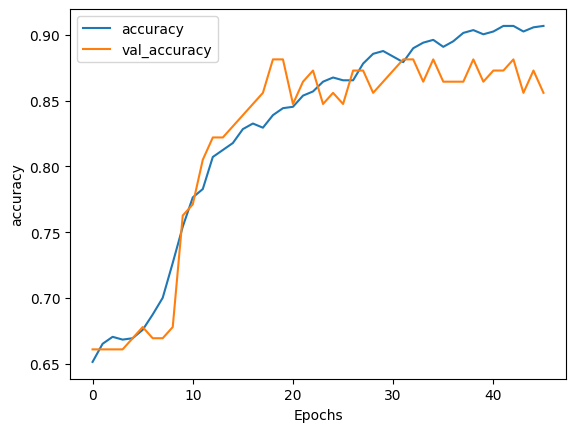

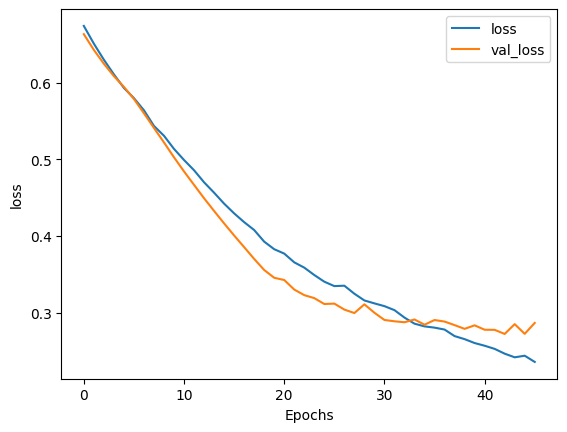

4/4 [==============================] - 2s 13ms/step

Training model with Dropout : 0.2
Epoch 1/100
59/59 [==============================] - 9s 47ms/step - loss: 0.6826 - accuracy: 0.6208 - val_loss: 0.6756 - val_accuracy: 0.6610
Epoch 2/100
59/59 [==============================] - 1s 17ms/step - loss: 0.6638 - accuracy: 0.6547 - val_loss: 0.6570 - val_accuracy: 0.6610
Epoch 3/100
59/59 [==============================] - 1s 17ms/step - loss: 0.6461 - accuracy: 0.6631 - val_loss: 0.6391 - val_accuracy: 0.6610
Epoch 4/100
59/59 [==============================] - 1s 17ms/step - loss: 0.6273 - accuracy: 0.6642 - val_loss: 0.6227 - val_accuracy: 0.6610
Epoch 5/100
59/59 [==============================] - 1s 17ms/step - loss: 0.6093 - accuracy: 0.6695 - val_loss: 0.6091 - val_accuracy: 0.6610
Epoch 6/100
59/59 [==============================] - 1s 17ms/step - loss: 0.5964 - accuracy: 0.6706 - val_loss: 0.5954 - val_accuracy: 0.6610
Epoch 7/100
59/59 [==============================] - 1s 17ms/

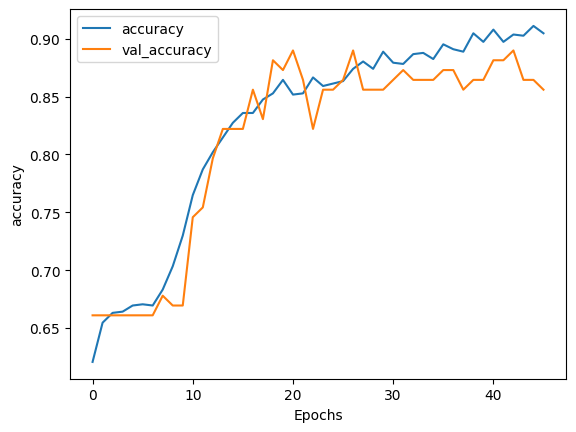

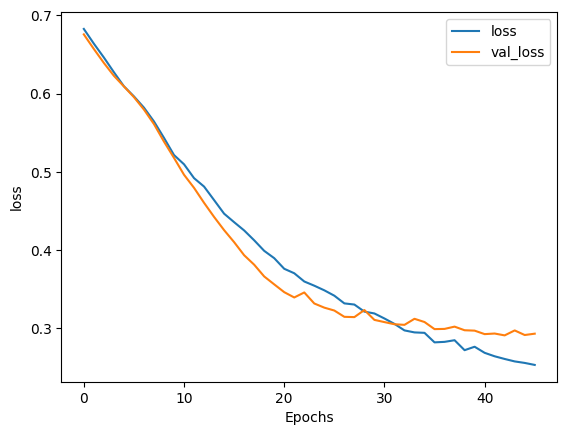

4/4 [==============================] - 1s 12ms/step

Training model with Dropout : 0.3
Epoch 1/100
59/59 [==============================] - 8s 38ms/step - loss: 0.6872 - accuracy: 0.5667 - val_loss: 0.6769 - val_accuracy: 0.6610
Epoch 2/100
59/59 [==============================] - 1s 19ms/step - loss: 0.6677 - accuracy: 0.6578 - val_loss: 0.6587 - val_accuracy: 0.6610
Epoch 3/100
59/59 [==============================] - 1s 18ms/step - loss: 0.6494 - accuracy: 0.6504 - val_loss: 0.6424 - val_accuracy: 0.6610
Epoch 4/100
59/59 [==============================] - 1s 18ms/step - loss: 0.6358 - accuracy: 0.6557 - val_loss: 0.6298 - val_accuracy: 0.6610
Epoch 5/100
59/59 [==============================] - 1s 19ms/step - loss: 0.6200 - accuracy: 0.6674 - val_loss: 0.6176 - val_accuracy: 0.6610
Epoch 6/100
59/59 [==============================] - 1s 20ms/step - loss: 0.6063 - accuracy: 0.6695 - val_loss: 0.6061 - val_accuracy: 0.6610
Epoch 7/100
59/59 [==============================] - 1s 20ms/

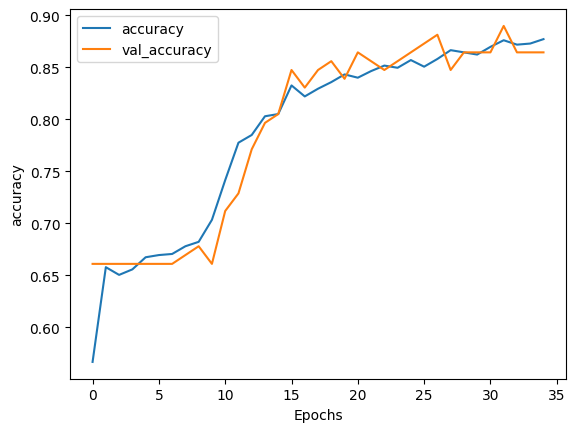

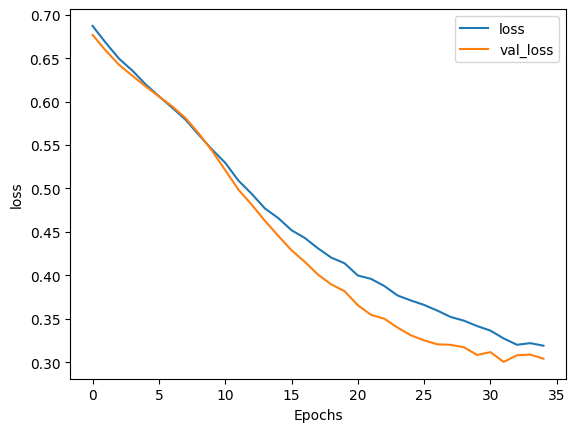

4/4 [==============================] - 2s 27ms/step

Training model with Dropout : 0.4
Epoch 1/100
59/59 [==============================] - 9s 46ms/step - loss: 0.6881 - accuracy: 0.5561 - val_loss: 0.6804 - val_accuracy: 0.6695
Epoch 2/100
59/59 [==============================] - 1s 22ms/step - loss: 0.6692 - accuracy: 0.6589 - val_loss: 0.6585 - val_accuracy: 0.6610
Epoch 3/100
59/59 [==============================] - 1s 21ms/step - loss: 0.6491 - accuracy: 0.6578 - val_loss: 0.6384 - val_accuracy: 0.6610
Epoch 4/100
59/59 [==============================] - 1s 20ms/step - loss: 0.6290 - accuracy: 0.6536 - val_loss: 0.6229 - val_accuracy: 0.6610
Epoch 5/100
59/59 [==============================] - 1s 21ms/step - loss: 0.6153 - accuracy: 0.6547 - val_loss: 0.6100 - val_accuracy: 0.6610
Epoch 6/100
59/59 [==============================] - 1s 20ms/step - loss: 0.5998 - accuracy: 0.6653 - val_loss: 0.5980 - val_accuracy: 0.6610
Epoch 7/100
59/59 [==============================] - 1s 20ms/

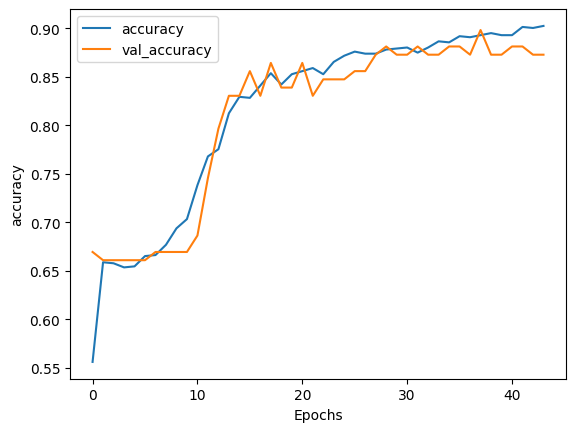

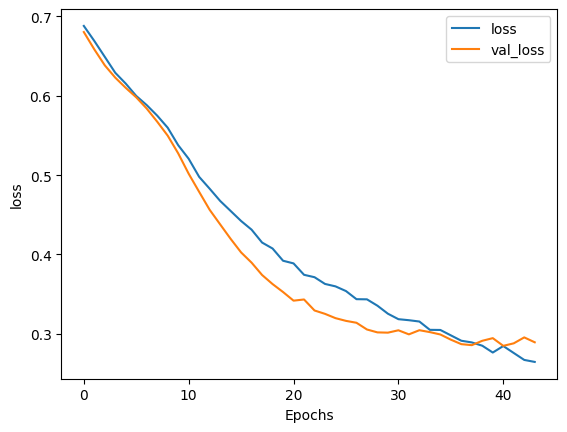

4/4 [==============================] - 2s 23ms/step

Training model with Dropout : 0.5
Epoch 1/100
59/59 [==============================] - 9s 45ms/step - loss: 0.6838 - accuracy: 0.6102 - val_loss: 0.6756 - val_accuracy: 0.6525
Epoch 2/100
59/59 [==============================] - 1s 18ms/step - loss: 0.6659 - accuracy: 0.6451 - val_loss: 0.6563 - val_accuracy: 0.6441
Epoch 3/100
59/59 [==============================] - 1s 18ms/step - loss: 0.6484 - accuracy: 0.6451 - val_loss: 0.6385 - val_accuracy: 0.6441
Epoch 4/100
59/59 [==============================] - 1s 18ms/step - loss: 0.6282 - accuracy: 0.6494 - val_loss: 0.6227 - val_accuracy: 0.6610
Epoch 5/100
59/59 [==============================] - 1s 19ms/step - loss: 0.6132 - accuracy: 0.6547 - val_loss: 0.6093 - val_accuracy: 0.6610
Epoch 6/100
59/59 [==============================] - 1s 19ms/step - loss: 0.6026 - accuracy: 0.6631 - val_loss: 0.5965 - val_accuracy: 0.6610
Epoch 7/100
59/59 [==============================] - 1s 19ms/

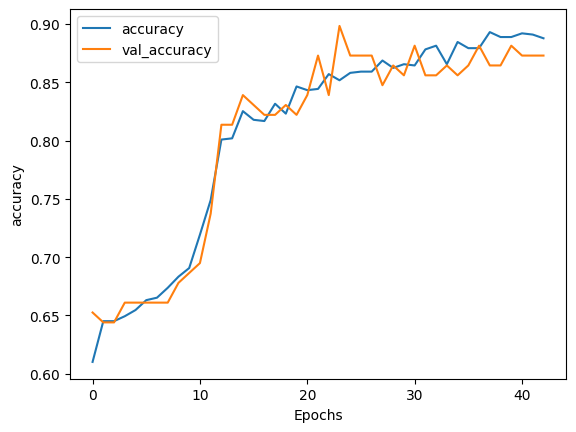

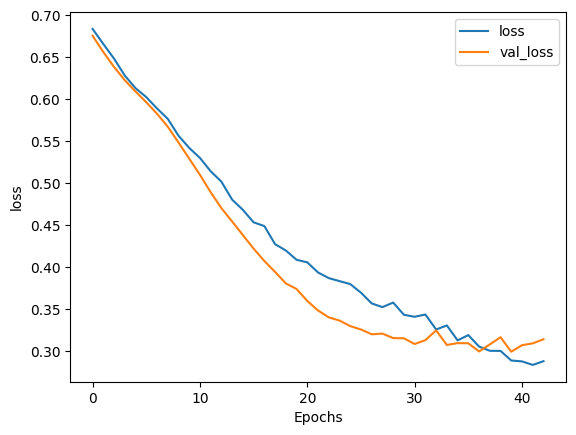

4/4 [==============================] - 1s 13ms/step

Best Result:
Best Dropout: 0.2
Validation Accuracy: 0.8898305296897888

Dropout: 0.1
Validation Loss: 0.27238690853118896
Validation Accuracy: 0.8813559412956238
F1-Score: 0.8205128205128205

Dropout: 0.2
Validation Loss: 0.2909773588180542
Validation Accuracy: 0.8898305296897888
F1-Score: 0.8354430379746834

Dropout: 0.3
Validation Loss: 0.30026212334632874
Validation Accuracy: 0.8898305296897888
F1-Score: 0.8433734939759037

Dropout: 0.4
Validation Loss: 0.2848227918148041
Validation Accuracy: 0.8813559412956238
F1-Score: 0.8205128205128205

Dropout: 0.5
Validation Loss: 0.29955053329467773
Validation Accuracy: 0.8813559412956238
F1-Score: 0.8205128205128205


In [21]:
# Initialize best results
best_val_accuracy = 0
dropouts = [0.1, 0.2, 0.3, 0.4, 0.5]
best_dropout = None

# Initialize lists to store results
hasil_loss = []
hasil_akurasi = []
hasil_fone = []

# Loop through hyperparameters
for dropout in dropouts:
        print(f"\nTraining model with Dropout : {dropout}")

        # Build BiGRU model
        model = Sequential()
        model.add(Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False))
        model.add(Bidirectional(GRU(best_unit)))
        model.add(Dropout(dropout))
        model.add(Dense((best_neuron), activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        # Compile model
        optimizer = Adam(learning_rate=0.0001)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', restore_best_weights=True)

        # Train model
        history = model.fit(X_train, Y_train, epochs=100, batch_size=16, validation_data=(X_val, Y_val), callbacks=[early_stopping])

        # Evaluate model on val data
        val_loss, val_accuracy = model.evaluate(X_val, Y_val)
        print(f'Validation accuracy: {val_accuracy}')
        print(f'Validation loss: {val_loss}')
        
        # Plotting loss and accuracy graphs
        def plot_graphs(history, string):
            plt.plot(history.history[string])
            plt.plot(history.history['val_'+string])
            plt.xlabel("Epochs")
            plt.ylabel(string)
            plt.legend([string, 'val_'+string])
            plt.show()

        # Plot the accuracy and loss history
        plot_graphs(history, 'accuracy')
        plot_graphs(history, 'loss')

        # Predict on validation data
        y_pred_prob = model.predict(X_val)

        # Thresholding to get predicted classes (0 or 1)
        y_pred = (y_pred_prob > 0.5).astype(int)

        # Classification report
        report = classification_report(Y_val, y_pred, output_dict=True)
        precision = report['1']['precision']
        recall = report['1']['recall']
        f1 = report['1']['f1-score']
        
        # Append results to list
        hasil_loss.append(val_loss)
        hasil_akurasi.append(val_accuracy)
        hasil_fone.append(f1)

        # Check if current result is the best
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_dropout = dropout
            
# Print the best result
print("\nBest Result:")
print(f"Best Dropout: {best_dropout}")
print(f"Validation Accuracy: {best_val_accuracy}")

# Print the results for each dropout
for i, dropout in enumerate(dropouts):
    print(f"\nDropout: {dropout}")
    print(f"Validation Loss: {hasil_loss[i]}")
    print(f"Validation Accuracy: {hasil_akurasi[i]}")
    print(f"F1-Score: {hasil_fone[i]}")

### Batch Size


Training model with Batch Size : 16
Epoch 1/100
59/59 [==============================] - 6s 33ms/step - loss: 0.6813 - accuracy: 0.6345 - val_loss: 0.6702 - val_accuracy: 0.6610
Epoch 2/100
59/59 [==============================] - 1s 18ms/step - loss: 0.6622 - accuracy: 0.6621 - val_loss: 0.6540 - val_accuracy: 0.6610
Epoch 3/100
59/59 [==============================] - 1s 17ms/step - loss: 0.6447 - accuracy: 0.6631 - val_loss: 0.6399 - val_accuracy: 0.6610
Epoch 4/100
59/59 [==============================] - 1s 18ms/step - loss: 0.6306 - accuracy: 0.6674 - val_loss: 0.6268 - val_accuracy: 0.6610
Epoch 5/100
59/59 [==============================] - 1s 17ms/step - loss: 0.6166 - accuracy: 0.6684 - val_loss: 0.6155 - val_accuracy: 0.6610
Epoch 6/100
59/59 [==============================] - 1s 17ms/step - loss: 0.6051 - accuracy: 0.6684 - val_loss: 0.6050 - val_accuracy: 0.6610
Epoch 7/100
59/59 [==============================] - 1s 17ms/step - loss: 0.5911 - accuracy: 0.6695 - val_loss:

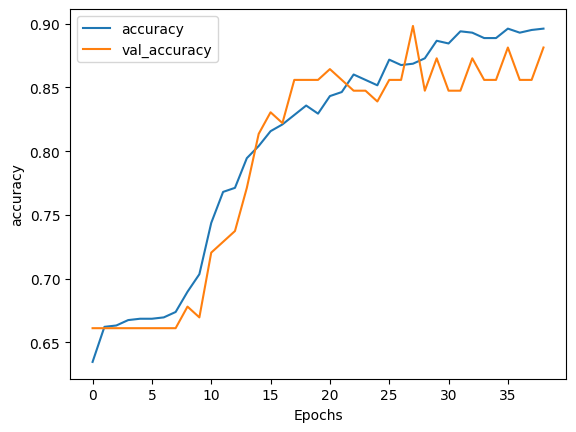

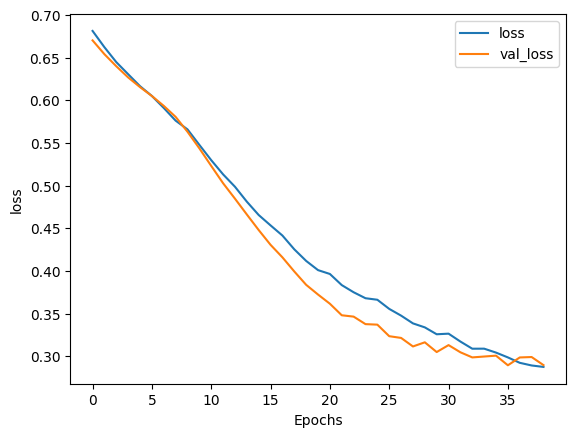

4/4 [==============================] - 1s 12ms/step

Training model with Batch Size : 32
Epoch 1/100
30/30 [==============================] - 8s 82ms/step - loss: 0.6939 - accuracy: 0.5275 - val_loss: 0.6893 - val_accuracy: 0.6186
Epoch 2/100
30/30 [==============================] - 1s 28ms/step - loss: 0.6827 - accuracy: 0.6314 - val_loss: 0.6776 - val_accuracy: 0.6610
Epoch 3/100
30/30 [==============================] - 1s 29ms/step - loss: 0.6705 - accuracy: 0.6631 - val_loss: 0.6652 - val_accuracy: 0.6610
Epoch 4/100
30/30 [==============================] - 1s 28ms/step - loss: 0.6582 - accuracy: 0.6600 - val_loss: 0.6531 - val_accuracy: 0.6610
Epoch 5/100
30/30 [==============================] - 1s 33ms/step - loss: 0.6450 - accuracy: 0.6631 - val_loss: 0.6417 - val_accuracy: 0.6610
Epoch 6/100
30/30 [==============================] - 1s 38ms/step - loss: 0.6330 - accuracy: 0.6578 - val_loss: 0.6311 - val_accuracy: 0.6610
Epoch 7/100
30/30 [==============================] - 1s 30m

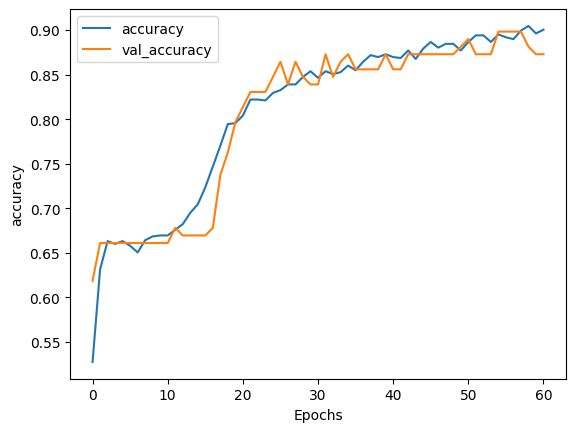

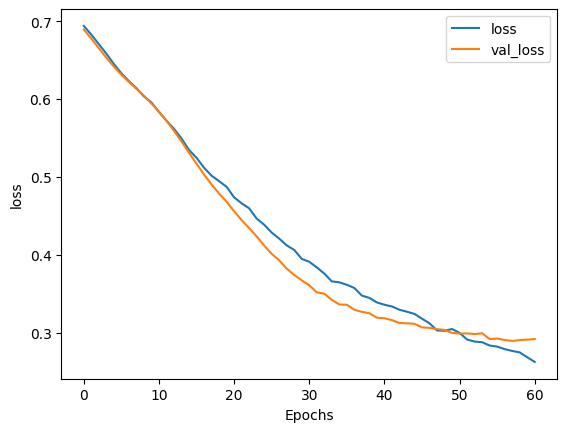

4/4 [==============================] - 2s 18ms/step

Training model with Batch Size : 64
Epoch 1/100
15/15 [==============================] - 10s 137ms/step - loss: 0.6953 - accuracy: 0.4862 - val_loss: 0.6918 - val_accuracy: 0.5254
Epoch 2/100
15/15 [==============================] - 1s 41ms/step - loss: 0.6884 - accuracy: 0.5847 - val_loss: 0.6854 - val_accuracy: 0.6610
Epoch 3/100
15/15 [==============================] - 1s 40ms/step - loss: 0.6820 - accuracy: 0.6494 - val_loss: 0.6796 - val_accuracy: 0.6441
Epoch 4/100
15/15 [==============================] - 1s 38ms/step - loss: 0.6765 - accuracy: 0.6536 - val_loss: 0.6734 - val_accuracy: 0.6610
Epoch 5/100
15/15 [==============================] - 1s 40ms/step - loss: 0.6695 - accuracy: 0.6578 - val_loss: 0.6666 - val_accuracy: 0.6610
Epoch 6/100
15/15 [==============================] - 1s 40ms/step - loss: 0.6630 - accuracy: 0.6621 - val_loss: 0.6601 - val_accuracy: 0.6610
Epoch 7/100
15/15 [==============================] - 1s 4

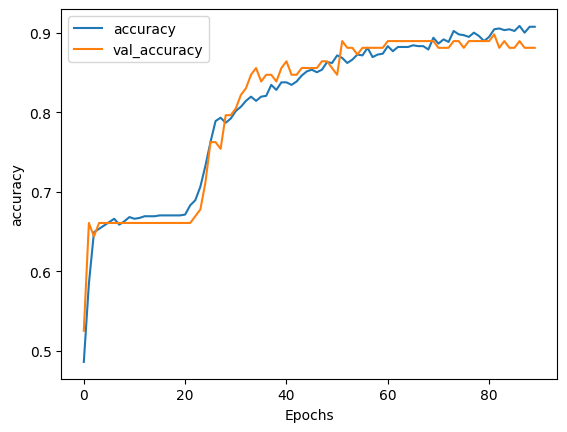

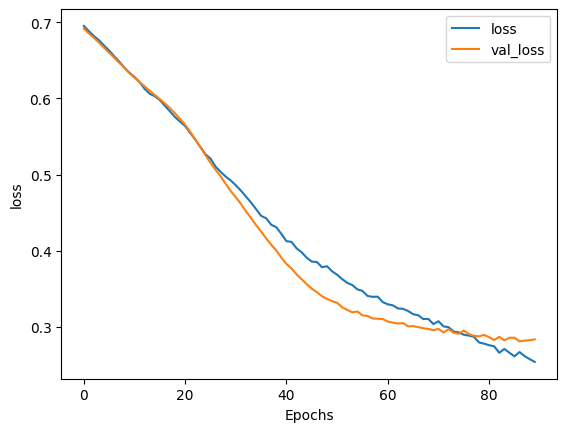

4/4 [==============================] - 1s 16ms/step

Best Result:
Best Batch Size: 32
Validation Accuracy: 0.8983050584793091

Batch Size: 16
Validation Loss: 0.28956109285354614
Validation Accuracy: 0.8813559412956238
F1-Score: 0.8205128205128205

Batch Size: 32
Validation Loss: 0.2894628047943115
Validation Accuracy: 0.8983050584793091
F1-Score: 0.8461538461538461

Batch Size: 64
Validation Loss: 0.2809794545173645
Validation Accuracy: 0.8898305296897888
F1-Score: 0.8311688311688312


In [22]:
# Initialize best results
best_val_accuracy = 0
batch_sizes = [16, 32, 64]
best_batch_size = None

# Initialize lists to store results
hasil_loss = []
hasil_akurasi = []
hasil_fone = []

# Loop through hyperparameters
for batch_size in batch_sizes:
        print(f"\nTraining model with Batch Size : {batch_size}")

        # Build BiGRU model
        model = Sequential()
        model.add(Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False))
        model.add(Bidirectional(GRU(best_unit)))
        model.add(Dropout(best_dropout))
        model.add(Dense(best_neuron, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        # Compile model
        optimizer = Adam(learning_rate=0.0001)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', restore_best_weights=True)

        # Train model
        history = model.fit(X_train, Y_train, epochs=100, batch_size=batch_size, validation_data=(X_val, Y_val), callbacks=[early_stopping])

        # Evaluate model on validation data
        val_loss, val_accuracy = model.evaluate(X_val, Y_val)
        print(f'Validation accuracy: {val_accuracy}')
        print(f'Validation loss: {val_loss}')
        
        # Plotting loss and accuracy graphs
        def plot_graphs(history, string):
            plt.plot(history.history[string])
            plt.plot(history.history['val_'+string])
            plt.xlabel("Epochs")
            plt.ylabel(string)
            plt.legend([string, 'val_'+string])
            plt.show()

        # Plot the accuracy and loss history
        plot_graphs(history, 'accuracy')
        plot_graphs(history, 'loss')

        # Predict on data validation
        y_pred_prob = model.predict(X_val)

        # Thresholding to get predicted classes (0 or 1)
        y_pred = (y_pred_prob > 0.5).astype(int)

        # Confusion matrix and classification report
        report = classification_report(Y_val, y_pred, digits=4, output_dict=True)
        precision = report['1']['precision']
        recall = report['1']['recall']
        f1 = report['1']['f1-score']

        # Append results to list
        hasil_loss.append(val_loss)
        hasil_akurasi.append(val_accuracy)
        hasil_fone.append(f1)
        
        # Check if current result is the best
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_batch_size = batch_size
            
# Print the best result
print("\nBest Result:")
print(f"Best Batch Size: {best_batch_size}")
print(f"Validation Accuracy: {best_val_accuracy}")

# Print the results for each batch size
for i, batch_size in enumerate(batch_sizes):
    print(f"\nBatch Size: {batch_size}")
    print(f"Validation Loss: {hasil_loss[i]}")
    print(f"Validation Accuracy: {hasil_akurasi[i]}")
    print(f"F1-Score: {hasil_fone[i]}")

### Learning Rate


Training model with Learning Rate : 0.01
Epoch 1/100
30/30 [==============================] - 6s 55ms/step - loss: 0.5311 - accuracy: 0.7331 - val_loss: 0.3810 - val_accuracy: 0.8305
Epoch 2/100
30/30 [==============================] - 1s 25ms/step - loss: 0.3504 - accuracy: 0.8496 - val_loss: 0.3393 - val_accuracy: 0.8305
Epoch 3/100
30/30 [==============================] - 1s 25ms/step - loss: 0.2964 - accuracy: 0.8814 - val_loss: 0.3182 - val_accuracy: 0.8390
Epoch 4/100
30/30 [==============================] - 1s 27ms/step - loss: 0.2252 - accuracy: 0.9121 - val_loss: 0.2815 - val_accuracy: 0.8644
Epoch 5/100
30/30 [==============================] - 1s 29ms/step - loss: 0.1761 - accuracy: 0.9227 - val_loss: 0.3083 - val_accuracy: 0.8898
Epoch 6/100
30/30 [==============================] - 1s 28ms/step - loss: 0.1928 - accuracy: 0.9195 - val_loss: 0.3415 - val_accuracy: 0.8898
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2815 - accuracy: 0.8644
Validati

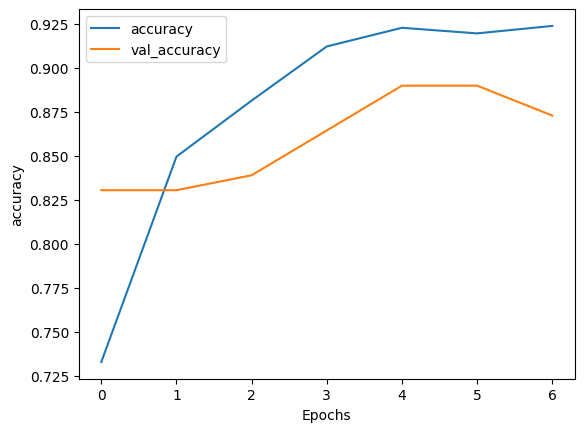

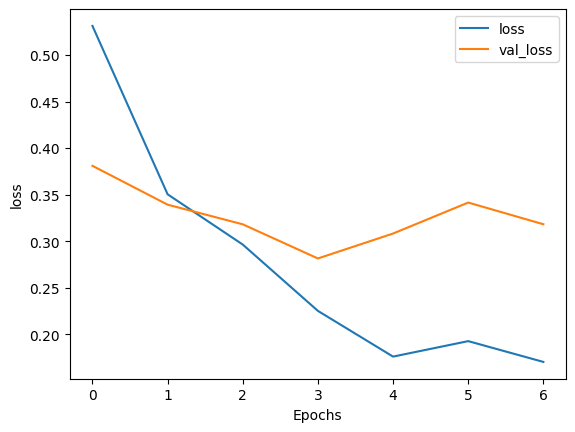

4/4 [==============================] - 1s 11ms/step

Training model with Learning Rate : 0.001
Epoch 1/100
30/30 [==============================] - 6s 58ms/step - loss: 0.6562 - accuracy: 0.6430 - val_loss: 0.6178 - val_accuracy: 0.6610
Epoch 2/100
30/30 [==============================] - 1s 28ms/step - loss: 0.5734 - accuracy: 0.6843 - val_loss: 0.5367 - val_accuracy: 0.6780
Epoch 3/100
30/30 [==============================] - 1s 29ms/step - loss: 0.4827 - accuracy: 0.7892 - val_loss: 0.4294 - val_accuracy: 0.8136
Epoch 4/100
30/30 [==============================] - 1s 29ms/step - loss: 0.4273 - accuracy: 0.8189 - val_loss: 0.3560 - val_accuracy: 0.8729
Epoch 5/100
30/30 [==============================] - 1s 33ms/step - loss: 0.3721 - accuracy: 0.8379 - val_loss: 0.3287 - val_accuracy: 0.8305
Epoch 6/100
30/30 [==============================] - 1s 29ms/step - loss: 0.3352 - accuracy: 0.8655 - val_loss: 0.2896 - val_accuracy: 0.8814
Epoch 7/100
30/30 [==============================] - 

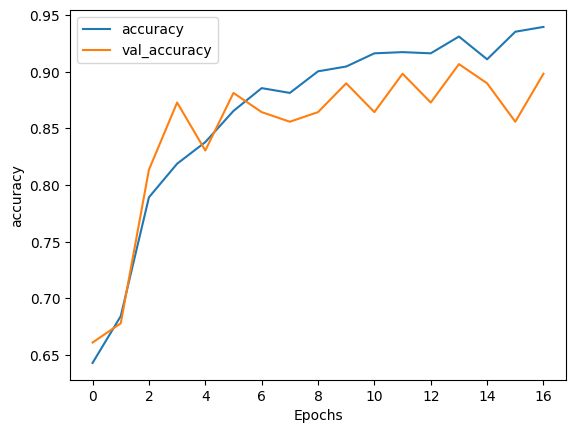

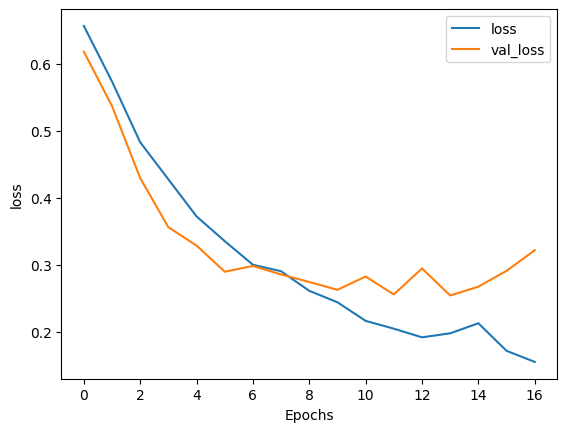

4/4 [==============================] - 1s 10ms/step

Training model with Learning Rate : 0.0001
Epoch 1/100
30/30 [==============================] - 7s 86ms/step - loss: 0.6781 - accuracy: 0.6345 - val_loss: 0.6716 - val_accuracy: 0.6441
Epoch 2/100
30/30 [==============================] - 1s 29ms/step - loss: 0.6642 - accuracy: 0.6398 - val_loss: 0.6574 - val_accuracy: 0.6441
Epoch 3/100
30/30 [==============================] - 1s 30ms/step - loss: 0.6503 - accuracy: 0.6398 - val_loss: 0.6433 - val_accuracy: 0.6441
Epoch 4/100
30/30 [==============================] - 1s 29ms/step - loss: 0.6348 - accuracy: 0.6409 - val_loss: 0.6312 - val_accuracy: 0.6441
Epoch 5/100
30/30 [==============================] - 1s 30ms/step - loss: 0.6232 - accuracy: 0.6398 - val_loss: 0.6203 - val_accuracy: 0.6441
Epoch 6/100
30/30 [==============================] - 1s 29ms/step - loss: 0.6148 - accuracy: 0.6409 - val_loss: 0.6104 - val_accuracy: 0.6441
Epoch 7/100
30/30 [==============================] -

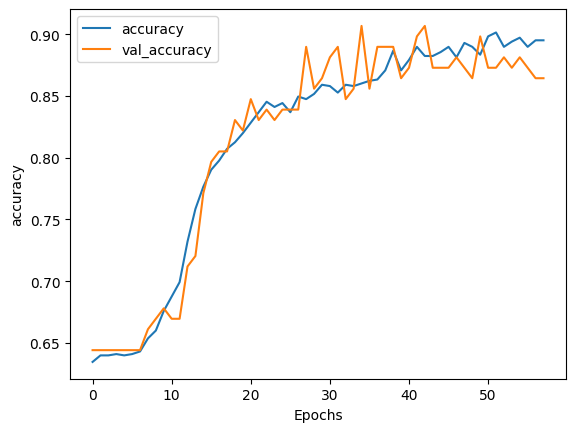

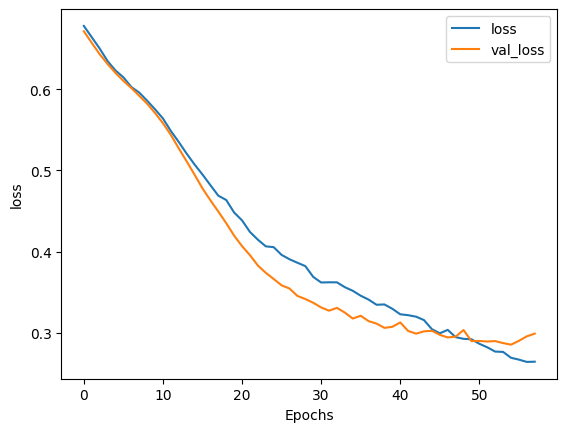

4/4 [==============================] - 1s 12ms/step

Best Result:
Best Learning Rate: 0.001
Validation Accuracy: 0.9067796468734741

Learning Rate: 0.01
Validation Loss: 0.28149428963661194
Validation Accuracy: 0.8644067645072937
F1-Score: 0.7837837837837837

Learning Rate: 0.001
Validation Loss: 0.2542305588722229
Validation Accuracy: 0.9067796468734741
F1-Score: 0.8735632183908046

Learning Rate: 0.0001
Validation Loss: 0.28525274991989136
Validation Accuracy: 0.8813559412956238
F1-Score: 0.8205128205128205


In [23]:
# Initialize best results
best_val_accuracy = 0
learning_rates = [0.01, 0.001, 0.0001]
best_learning_rate = None

# Initialize lists to store results
hasil_loss = []
hasil_akurasi = []
hasil_fone = []

# Loop through hyperparameters
for learning_rate in learning_rates:
        print(f"\nTraining model with Learning Rate : {learning_rate}")

        # Build BiGRU model
        model = Sequential()
        model.add(Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False))
        model.add(Bidirectional(GRU(best_unit)))
        model.add(Dropout(best_dropout))
        model.add(Dense((best_neuron), activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        # Compile model
        optimizer = Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', restore_best_weights=True)

        # Train model
        history = model.fit(X_train, Y_train, epochs=100, batch_size=best_batch_size, validation_data=(X_val, Y_val), callbacks=[early_stopping])

        # Evaluate model on test data
        val_loss, val_accuracy = model.evaluate(X_val, Y_val)
        print(f'Validation loss: {val_loss}')
        print(f'Validation accuracy: {val_accuracy}')
        
        # Plotting loss and accuracy graphs
        def plot_graphs(history, string):
            plt.plot(history.history[string])
            plt.plot(history.history['val_'+string])
            plt.xlabel("Epochs")
            plt.ylabel(string)
            plt.legend([string, 'val_'+string])
            plt.show()

        # Plot the accuracy and loss history
        plot_graphs(history, 'accuracy')
        plot_graphs(history, 'loss')

        # Predict on validation data
        y_pred_prob = model.predict(X_val)

        # Thresholding to get predicted classes (0 or 1)
        y_pred = (y_pred_prob > 0.5).astype(int)

        # Classification report
        report = classification_report(Y_val, y_pred, output_dict=True)
        precision = report['1']['precision']
        recall = report['1']['recall']
        f1 = report['1']['f1-score']
        
        # Append results to lists
        hasil_loss.append(val_loss)
        hasil_akurasi.append(val_accuracy)
        hasil_fone.append(f1)

        # Check if current result is the best
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_learning_rate = learning_rate
            
# Print the best result
print("\nBest Result:")
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Validation Accuracy: {best_val_accuracy}")

# Print the results for each batch size
for i, learning_rate in enumerate(learning_rates):
    print(f"\nLearning Rate: {learning_rate}")
    print(f"Validation Loss: {hasil_loss[i]}")
    print(f"Validation Accuracy: {hasil_akurasi[i]}")
    print(f"F1-Score: {hasil_fone[i]}")

### Hyperparameter Optimal Bi-GRU

Epoch 1/100
30/30 [==============================] - 7s 56ms/step - loss: 0.6479 - accuracy: 0.6441 - val_loss: 0.6020 - val_accuracy: 0.6610
Epoch 2/100
30/30 [==============================] - 1s 29ms/step - loss: 0.5568 - accuracy: 0.7076 - val_loss: 0.5006 - val_accuracy: 0.7542
Epoch 3/100
30/30 [==============================] - 1s 28ms/step - loss: 0.4718 - accuracy: 0.7977 - val_loss: 0.4053 - val_accuracy: 0.8390
Epoch 4/100
30/30 [==============================] - 1s 28ms/step - loss: 0.4089 - accuracy: 0.8294 - val_loss: 0.3353 - val_accuracy: 0.8644
Epoch 5/100
30/30 [==============================] - 1s 29ms/step - loss: 0.3644 - accuracy: 0.8612 - val_loss: 0.3191 - val_accuracy: 0.8475
Epoch 6/100
30/30 [==============================] - 1s 33ms/step - loss: 0.3292 - accuracy: 0.8697 - val_loss: 0.2952 - val_accuracy: 0.8475
Epoch 7/100
30/30 [==============================] - 1s 32ms/step - loss: 0.2978 - accuracy: 0.8867 - val_loss: 0.2869 - val_accuracy: 0.8644
Epoch 

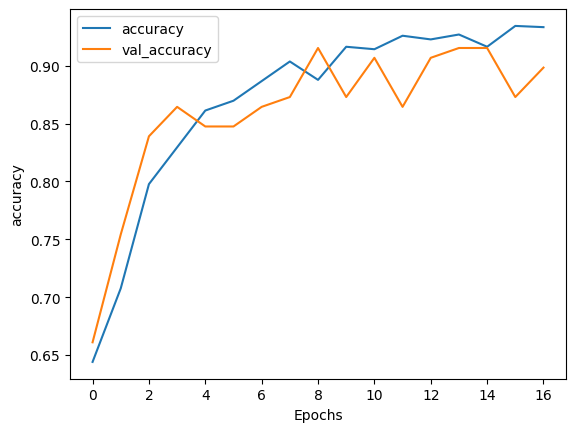

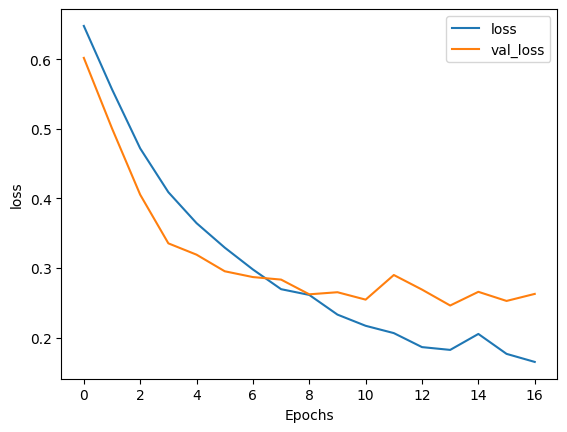

4/4 [==============================] - 1s 10ms/step


In [28]:
# Build BiGRU model
model = Sequential()
model.add(Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(GRU(32)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', restore_best_weights=True)

# Train model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_val, Y_val), callbacks=[early_stopping])

# Evaluate model on test data
_, accuracy = model.evaluate(X_test, Y_test)
print(f'Accuracy on test data: {accuracy}')
        
# Plotting loss and accuracy graphs
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Plot the accuracy and loss history
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

# Predict on test data
y_pred_prob = model.predict(X_test)

# Thresholding to get predicted classes (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
report = classification_report(Y_test, y_pred, output_dict=True)
precision = report['1']['precision']
recall = report['1']['recall']
f1 = report['1']['f1-score']


Classification Report:
              precision    recall  f1-score   support

           0     0.8857    0.8158    0.8493        76
           1     0.7143    0.8140    0.7609        43

    accuracy                         0.8151       119
   macro avg     0.8000    0.8149    0.8051       119
weighted avg     0.8238    0.8151    0.8174       119



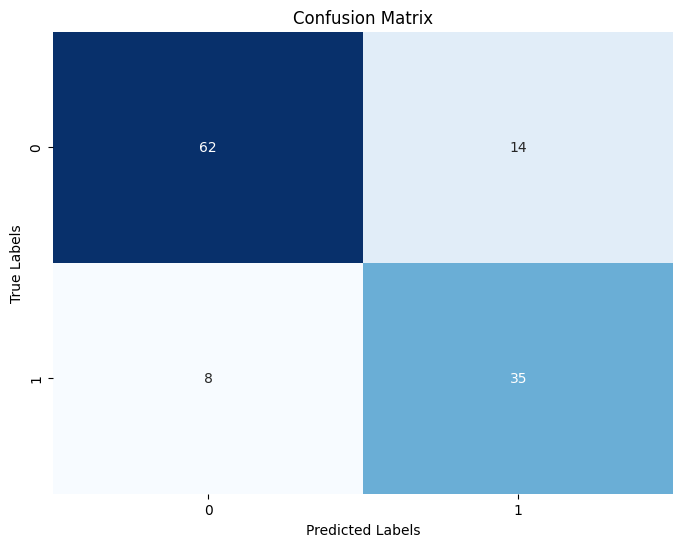

In [29]:
# Classification report
print('Classification Report:')
print(classification_report(Y_test, y_pred, digits = 4, output_dict = False))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd', cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()